# Business problem understanding
## Business context
Olist Store is a Brazilian e-commerce platform, enambling small and medium-sized business to sell their products across multiple marketplaces through a single channel. Established in 2015, Olist helps sellers by providing services such as logistic support, marketing tools, and payment services. 

E-commerce business in Brazil is rapidly growing, but with an increasingly competitive landscape, customer retention becomes crucial. Studies show that aquiring a new customer can cost five times more than retaining an existing one. Moreover, 5% increase in customer retention can boost a company's profit by 25% to 95%. Retaining a new customer is also affecting the success of selling rate with 60% to 70% for existing customers and 5% to 20% for the new customers. Given this facts, understanding customer behaviour, churn pattern, and implementing data-driven strategies are essential to drive long-term business success as well as stay ahead of the competitors. 

## Problem statement
Olist has been growing since it was established in 2015, but like any other e-commerce platform, it faces the challenge of customer churn. According to a study, the average churn rate in an e-commerce ranging between 20% and 25% anually. Thus, if there is no strategies applied, substantial amount of customers will disengage and will result in substantial revenue loss over time.

To address this, Olist allocates a marketing budget to retain customer. However, not all customers having an aqual at risk churning, and using a one-size-fits-all approach can be inefficient and costly. Instead, iddentifying the right customers to target allows for more effective and sustainable marketing strategies.

By identifying the characteristics of customers who are likely to churn, proactive personalized retention strategies can be implemented, for example personalized promotions, targeted discounts, tailored product recommendations, and improved sevices. This way, marketing budget is spent effectively while also increasing customer engagement.


## Goals
Based on the background above, the study aims to develop a machne learning model to predict the likelihood of customer churn. By analyzing historical transaction data, the model will identify key factors that contribute to churn. 

From here, the behavioral patterns of high-risk customer can be examined to uncover common characteristics. These insights will enable Olist to implement data-driven retention strategies, ensuring that at-risk customers receive targeted marketing campaigns. 

## Analytic approach
The study was conducted by performing churn analysis framework. 
(soon well be completed.... not sure what to write (?????))

## Data information
source: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
The data is provided by Olist from year 2016 - 2018 with more than 100k orders information. The data is divided into multiple files in which its connection is shown in the schema below



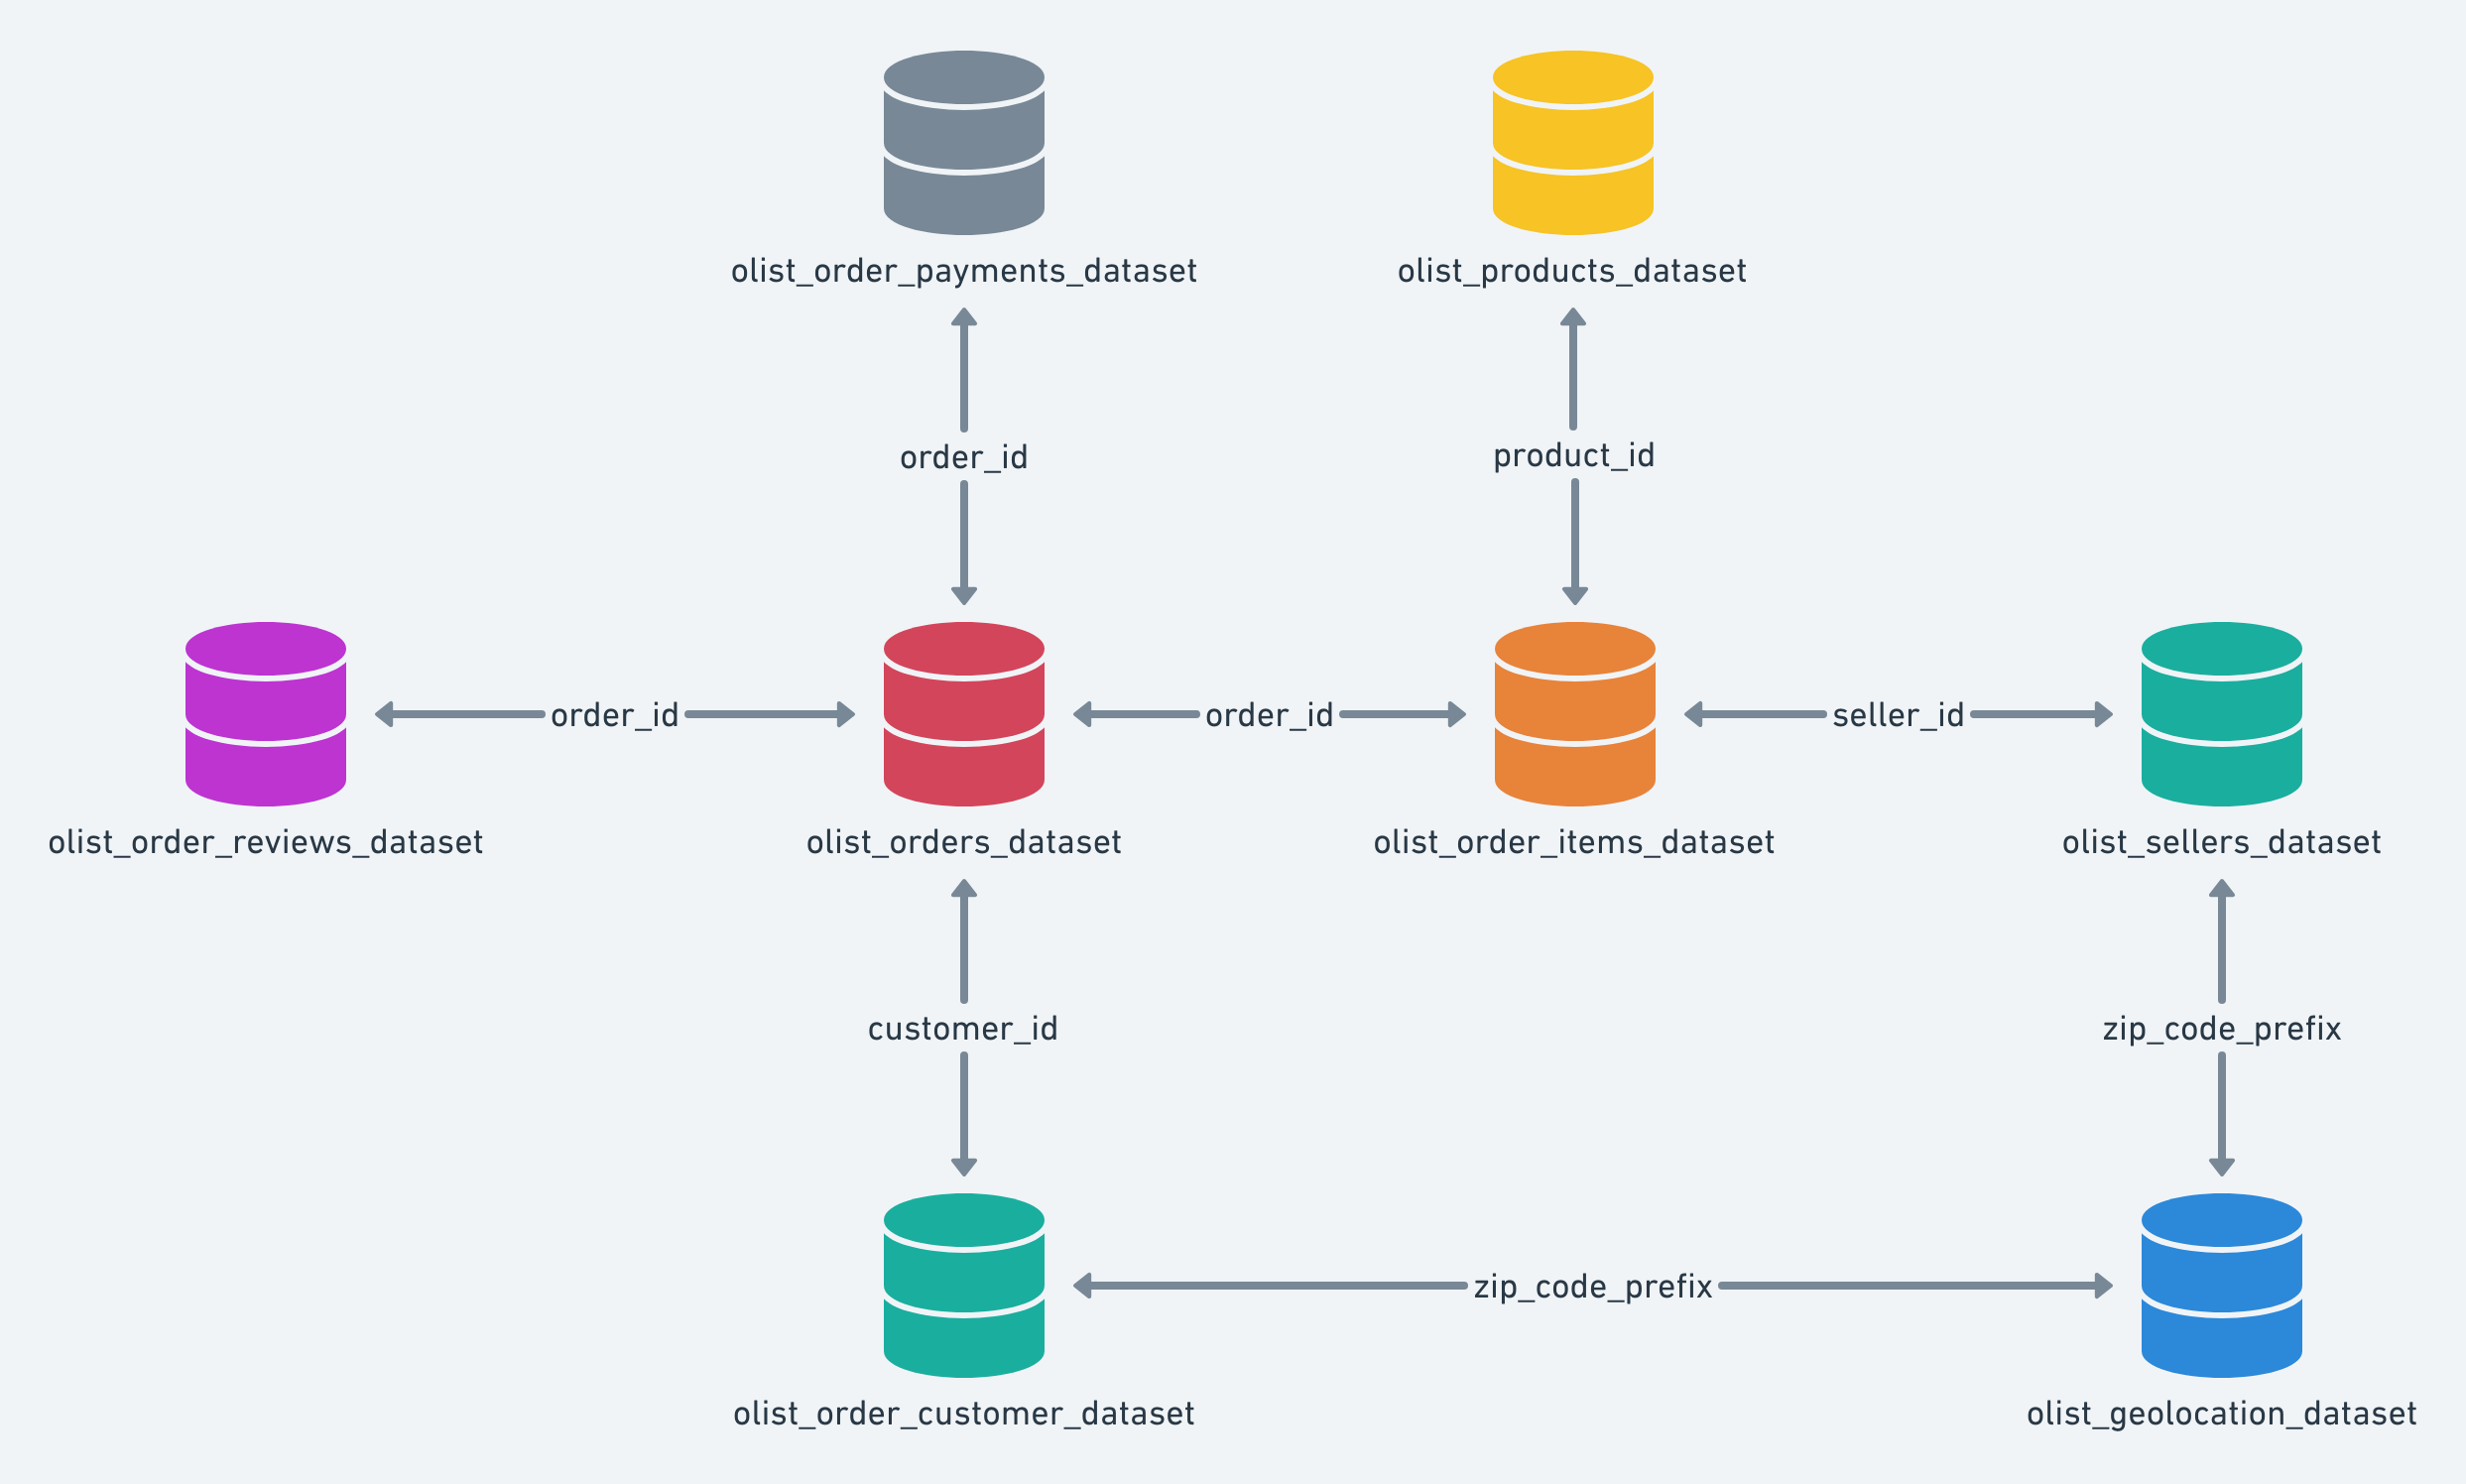

In [11]:
from IPython.display import Image

Image(filename=r'C:\Users\u0150029\Documents\PWD\final_project_alpha\untitled.png')

**Data Dictionary**


| Dataset                     | Column                          | Description                                                                 |
|-----------------------------|--------------------------------|---------------------------------------------------------------------------|
| **olist_customers_dataset**  | customer_id                    | Unique ID of the customer who placed an order                                  |
|                             | customer_unique_id             | 	Unique ID that distinguishes customers more specifically                   |
|                             | customer_zip_code_prefix       | Customer's zip code                                                        |
|                             | customer_city                  | City where the customer resides                                             |
|                             | customer_state                 | State where the customer resides                                           |
| **olist_geolocation_dataset** | geolocation_zip_code_prefix   | Zip code of the geographical location                                                 |
|                             | geolocation_lat                | Latitude of the geographical location                                            |
|                             | geolocation_lng                | Longitude of the geographical location                                           |
|                             | geolocation_city               | City where the geographical location is                                              |
|                             | geolocation_state              | State or province where the geographical location is                       |
| **olist_order_items_dataset** | order_id                      | Unique ID for each order                                             |
|                             | order_item_id                  | Unique ID for each item within an order                                   |
|                             | product_id                     | Unique ID of the purchased product                                                |
|                             | seller_id                      | ID of the seller who sold the product                                            |
|                             | shipping_limit_date            | Shipping deadline for the product                                             |
|                             | price                          | Price of the purchased product                                                  |
|                             | freight_value                  | Shipping cost for the product                                             |
| **olist_order_payments_dataset** | order_id                    | Order ID associated with the payment                                 |
|                             | payment_sequential             | Payment sequence within the order                                          |
|                             | payment_type                   | Payment method (e.g., credit card)                                |
|                             | payment_installments           | Number of installments chosen                                               |
|                             | payment_value                  | Total payment amount                                                    |
| **olist_order_reviews_dataset** | review_id                    | Unique ID for each review given                               |
|                             | order_id                       | Order ID associated with the review                                     |
|                             | review_score                   | Score given by the customer for the product (e.g., 1 to 5)    |
|                             | review_comment_title           | Title of the review comment                                                     |
|                             | review_comment_message         | Content of the review comment given by the customer              |
|                             | review_creation_date           | Date and time when the review was created                                           |
|                             | review_answer_timestamp        | Date and time when the review was answered by the seller or relevant party   |
| **olist_orders_dataset**     | order_id                       | Unique ID for each order                                             |
|                             | customer_id                    | Unique ID of the customer who placed the order                                  |
|                             | order_status                   | Current status of the order (e.g., processing, shipped, or completed)    |
|                             | order_purchase_timestamp       | Date and time when the order was placed                                       |
|                             | order_approved_at              | Date and time when the order was approved                                       |
|                             | order_delivered_carrier_date   | Date the product was shipped by the carrier                                      |
|                             | order_delivered_customer_date  | Date the product was received by the customer                                    |
|                             | order_estimated_delivery_date  | Estimated date for product delivery                               |
| **olist_products_dataset**   | product_category_name_translation | Product name in Portuguese                                        |
|                             | product_category_name          | Product name in Portuguese                                        |
|                             | product_category_name_english  | Product name in English                                         |
|                             | product_id                     | Unique identifier for each product                                    |
|                             | product_category_name          | Category name where the product belongs                               |
|                             | product_name_lenght            | Length of the product name (characters)                                          |
|                             | product_description_lenght     | Length of the product description (characters)                                     |
|                             | product_photos_qty             | Number of available product photos                                                     |
|                             | product_weight_g               | Product weight (grams)                                                         |
|                             | product_length_cm              | Product length (cm)                                                      |
|                             | product_height_cm              | Product height (cm)                                                       |
|                             | product_width_cm               | Product width (cm)                                                        |
| **olist_sellers_dataset**    | seller_id                      | Unique ID for each seller in the system                                       |
|                             | seller_zip_code_prefix         | Zip code of the seller's residence or location                               |
|                             | seller_city                    | City where the seller is located                                           |
|                             | seller_state                   | State or province where the seller is located                    |


# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
geoloc = pd.read_csv('olist_geolocation_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
products_en = pd.read_csv('product_category_name_translation.csv')

In [3]:
display(customers.head(), geoloc.head(), items.head(), payments.head(), reviews.head(), orders.head(), products.head(), sellers.head(), products_en.head())

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

## Translate the products name into English (was in Portugese)

In [4]:
products = products.merge(products_en, how='left', on='product_category_name')

In [5]:
products

product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0                 4.0   
...                    ...                         ...                 ...   
32946                 45.0                        67.0                 2.0   
32947                 41.0                       971.0                 1.0   
32948                 50.0                       799.0                 1.0   
32949                 60.0                       156.0                 2.0   
32950                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
2                 154.0               18.0                9.0   
3                 371.0               26.0                4.0   
4                 625.0               20.0               17.0   
...                 ...                ...                ...   
32946           12300.0               40.0               40.0   
32947            1700.0               16.0               19.0   
32948            1400.0               27.0                7.0   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm product_category_name_english  
0                  14.0                     perfumery  
1                  20.0                           art  
2                  15.0                sports_leisure  
3                  26.0                          baby  
4                  13.0                    housewares  
...                 ...                           ...  
32946              40.0               furniture_decor  
32947              16.0     construction_tools_lights  
32948              27.0                bed_bath_table  
32949              20.0         computers_accessories  
32950               7.0                bed_bath_table  

[32951 rows x 10 columns]

In [6]:
#check how many unique values between both to ensure each product has english translation
# pt stands for portuguese

n_products_pt = products['product_category_name'].nunique()
print(f'Number of products in Portuese is: {n_products_pt}')

n_products_en = products_en['product_category_name'].nunique()
print(f'Number of products in English is: {n_products_en}')

Number of products in Portuese is: 73
Number of products in English is: 71


In [7]:
#above result shows that there are 2 missing translations. Code below will perform further check
missing_cat = products.loc[products['product_category_name_english'].isna(), 'product_category_name'].unique()
missing_cat

array([nan, 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'],
      dtype=object)

As shown above, there are two categories missing from the product_en and here manual translation will be performed using chatGPT. 
The translation for 'portateis_cozinha_e_preparadores_de_alimentos' is 'portable_kitchen_and_food_processors'.
Here, pc_gamer is already in English, however it will still be incorporated to the 'product_category_name_english'.  

In [8]:
products[products['product_category_name'].isin(['portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer'])].head()

product_id  \
1628  0105b5323d24fc655f73052694dbbb3a   
5821  6fd83eb3e0799b775e4f946bd66657c0   
7325  5d923ead886c44b86845f69e50520c3e   
7478  6727051471a0fc4a0e7737b57bff2549   
8819  bed164d9d628cf0593003389c535c6e0   

                              product_category_name  product_name_lenght  \
1628                                       pc_gamer                 59.0   
5821  portateis_cozinha_e_preparadores_de_alimentos                 52.0   
7325  portateis_cozinha_e_preparadores_de_alimentos                 58.0   
7478                                       pc_gamer                 60.0   
8819  portateis_cozinha_e_preparadores_de_alimentos                 54.0   

      product_description_lenght  product_photos_qty  product_weight_g  \
1628                       621.0                 4.0            2839.0   
5821                       280.0                 1.0            1200.0   
7325                       284.0                 1.0            1200.0   
7478                      1532.0                 3.0             650.0   
8819                       382.0                 2.0             850.0   

      product_length_cm  product_height_cm  product_width_cm  \
1628               19.0               16.0              18.0   
5821               25.0               33.0              25.0   
7325               25.0               33.0              25.0   
7478               16.0               22.0              20.0   
8819               30.0               21.0              22.0   

     product_category_name_english  
1628                           NaN  
5821                           NaN  
7325                           NaN  
7478                           NaN  
8819                           NaN

In [9]:
mapping = {'pc_gamer': 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos': 'portable_kitchen_and_food_processors'}
products.loc[products['product_category_name_english'].isna(), 'product_category_name_english'] = (products['product_category_name'].map(mapping))

In [10]:
#check
products[products['product_category_name'].isin(['portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer'])].head()

product_id  \
1628  0105b5323d24fc655f73052694dbbb3a   
5821  6fd83eb3e0799b775e4f946bd66657c0   
7325  5d923ead886c44b86845f69e50520c3e   
7478  6727051471a0fc4a0e7737b57bff2549   
8819  bed164d9d628cf0593003389c535c6e0   

                              product_category_name  product_name_lenght  \
1628                                       pc_gamer                 59.0   
5821  portateis_cozinha_e_preparadores_de_alimentos                 52.0   
7325  portateis_cozinha_e_preparadores_de_alimentos                 58.0   
7478                                       pc_gamer                 60.0   
8819  portateis_cozinha_e_preparadores_de_alimentos                 54.0   

      product_description_lenght  product_photos_qty  product_weight_g  \
1628                       621.0                 4.0            2839.0   
5821                       280.0                 1.0            1200.0   
7325                       284.0                 1.0            1200.0   
7478                      1532.0                 3.0             650.0   
8819                       382.0                 2.0             850.0   

      product_length_cm  product_height_cm  product_width_cm  \
1628               19.0               16.0              18.0   
5821               25.0               33.0              25.0   
7325               25.0               33.0              25.0   
7478               16.0               22.0              20.0   
8819               30.0               21.0              22.0   

             product_category_name_english  
1628                              pc_gamer  
5821  portable_kitchen_and_food_processors  
7325  portable_kitchen_and_food_processors  
7478                              pc_gamer  
8819  portable_kitchen_and_food_processors

In [11]:
products['product_category_name'].isna().sum()

610

In [12]:
products['product_category_name_english'].nunique()

73

In [13]:
products['product_category_name_english'].unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', nan, 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
       'hom

Here, we observed that actually the product names are redundant. Thus, we want to create a new column which specifies which group does each product name belong to

In [14]:
# Create a dictionary with mappings to simplify the categories
category_map = {
    'small_appliances': 'home_and_kitchen',
    'home_appliances': 'home_and_kitchen',
    'home_appliances_2': 'home_and_kitchen',
    'air_conditioning': 'home_and_kitchen',
    'home_comfort_2': 'home_and_kitchen',
    'home_confort': 'home_and_kitchen',
    'portable_kitchen_and_food_processors': 'home_and_kitchen',
    'small_appliances_home_oven_and_coffee': 'home_and_kitchen',
    'bed_bath_table': 'home_and_kitchen',
    'housewares': 'home_and_kitchen',
    'kitchen_dining_laundry_garden_furniture': 'home_and_kitchen',
    
    
    'furniture_living_room': 'furniture',
    'furniture_bedroom': 'furniture',
    'furniture_mattress_and_upholstery': 'furniture',
    'furniture_decor': 'furniture', 
    
    'fashion_bags_accessories': 'fashion',
    'fashion_shoes': 'fashion',
    'fashion_male_clothing': 'fashion',
    'fashio_female_clothing': 'fashion',
    'fashion_underwear_beach': 'fashion',
     
    'baby': 'baby_and_children',
    'fashion_childrens_clothes': 'baby_and_children', 
    
    'books_general_interest': 'books',
    'books_technical': 'books',
    'books_imported': 'books',
    
    'toys': 'toys_and_games',
    'consoles_games': 'toys_and_games',
    
    'food': 'food_and_beverages',
    'food_drink': 'food_and_beverages',
    'drinks': 'food_and_beverages',
    'la_cuisine': 'food_and_beverages', 
    
    'health_beauty': 'health_and_beauty',
    'diapers_and_hygiene': 'health_and_beauty',
    'perfumery': 'health_and_beauty', 
    
    'sports_leisure': 'sports_and_leisure',
    'fashion_sport': 'sports_and_leisure',
    
    'electronics': 'electronics',
    'computers': 'electronics',
    'computers_accessories': 'electronics',
    'audio': 'electronics',
    'telephony': 'electronics', 
    'tablets_printing_image': 'electronics', 
    'fixed_telephony': 'electronics', 
    'pc_gamer': 'electronics',
    
    'stationery': 'office_and_stationery',
    'office_furniture': 'office_and_stationery', 

    'construction_tools_construction': 'tools_and_construction', 
    'construction_tools_lights': 'tools_and_construction',
    'costruction_tools_garden': 'tools_and_construction',
    'home_construction': 'tools_and_construction',
    'construction_tools_safety': 'tools_and_construction', 
    'garden_tools': 'tools_and_construction',
    'costruction_tools_tools': 'tools_and_construction',

    'signaling_and_security': 'security_and_services',
    'security_and_services': 'security_and_services',

    'cool_stuff': 'gifts_and_miscellaneous',
    'watches_gifts': 'gifts_and_miscellaneous',
    'flowers': 'gifts_and_miscellaneous',
    'party_supplies': 'gifts_and_miscellaneous',
    'christmas_supplies': 'gifts_and_miscellaneous',
    'auto': 'gifts_and_miscellaneous',
    'luggage_accessories': 'gifts_and_miscellaneous',
    
    'market_place': 'marketplace',

    'cds_dvds_musicals': 'media',
    'cine_photo': 'media',
    'dvds_blu_ray': 'media',
    
    'music': 'music_and_art',
    'musical_instruments': 'music_and_art',
    'arts_and_craftmanship': 'music_and_art',
    'arts_and_crafts': 'music_and_art',
    'art': 'music_and_art', 

    'pet_shop': 'pet_shop', 
    
    'industry_commerce_and_business': 'industry_and_business',
    'agro_industry_and_commerce': 'industry_and_business', 
}

In [15]:
products['grouped_category'] = products['product_category_name_english'].map(category_map)

In [16]:
products[['product_category_name_english', 'grouped_category']].head()

product_category_name_english    grouped_category
0                     perfumery   health_and_beauty
1                           art       music_and_art
2                sports_leisure  sports_and_leisure
3                          baby   baby_and_children
4                    housewares    home_and_kitchen

In [17]:
nan_rows = products[products['grouped_category'].notna()][['product_category_name','grouped_category', 'product_category_name_english']]
nan_rows

product_category_name        grouped_category  \
0                             perfumaria       health_and_beauty   
1                                  artes           music_and_art   
2                          esporte_lazer      sports_and_leisure   
3                                  bebes       baby_and_children   
4                  utilidades_domesticas        home_and_kitchen   
...                                  ...                     ...   
32946                   moveis_decoracao               furniture   
32947  construcao_ferramentas_iluminacao  tools_and_construction   
32948                    cama_mesa_banho        home_and_kitchen   
32949             informatica_acessorios             electronics   
32950                    cama_mesa_banho        home_and_kitchen   

      product_category_name_english  
0                         perfumery  
1                               art  
2                    sports_leisure  
3                              baby  
4                        housewares  
...                             ...  
32946               furniture_decor  
32947     construction_tools_lights  
32948                bed_bath_table  
32949         computers_accessories  
32950                bed_bath_table  

[32341 rows x 3 columns]

In [18]:
print(products[['grouped_category', 'product_category_name_english']].isna().sum())

grouped_category                 610
product_category_name_english    610
dtype: int64


## Merging Data

In [19]:
df = orders.merge(items, how='left', on='order_id')
df = df.merge(payments, how='outer', on='order_id')
df = df.merge(reviews, how='outer', on='order_id')
df = df.merge(products, how='outer', on='product_id')
df = df.merge(customers, how='outer', on='customer_id')
df = df.merge(sellers, how='outer', on='seller_id')

In [20]:
df.head()

order_id                       customer_id  \
0  d455a8cb295653b55abda06d434ab492  944b72539d7e1f7f7fc6e46639ef1fe3   
1  7f39ba4c9052be115350065d07583cac  d7fc82cbeafea77bd0a8fbbf6296e387   
2  9dc8d1a6f16f1b89874c29c9d8d30447  d9442164acf4b03109425633efaa0cfc   
3  0f548bd29148ebc519d6495e37a284e1  015faf9ec36eccd957c0f2782aab09a4   
4  0f548bd29148ebc519d6495e37a284e1  015faf9ec36eccd957c0f2782aab09a4   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-09-26 22:17:05  2017-09-27 22:24:16   
1    delivered      2017-10-18 08:16:34  2017-10-18 23:56:20   
2    delivered      2017-10-12 13:33:22  2017-10-12 13:49:22   
3    delivered      2017-09-03 08:06:30  2017-09-03 08:25:50   
4    delivered      2017-09-03 08:06:30  2017-09-03 08:25:50   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-09-29 15:53:03           2017-10-07 16:12:47   
1          2017-10-20 14:29:01           2017-10-27 16:46:05   
2          2017-10-17 15:42:42           2017-10-24 20:17:44   
3          2017-09-04 22:03:06           2017-09-08 16:26:55   
4          2017-09-04 22:03:06           2017-09-08 16:26:55   

  order_estimated_delivery_date  order_item_id  \
0           2017-10-30 00:00:00            1.0   
1           2017-11-09 00:00:00            1.0   
2           2017-11-06 00:00:00            1.0   
3           2017-09-27 00:00:00            1.0   
4           2017-09-27 00:00:00            2.0   

                         product_id  ... product_width_cm  \
0  a2ff5a97bf95719e38ea2e3b4105bce8  ...             36.0   
1  a2ff5a97bf95719e38ea2e3b4105bce8  ...             36.0   
2  a2ff5a97bf95719e38ea2e3b4105bce8  ...             36.0   
3  08574b074924071f4e201e151b152b4e  ...             39.0   
4  08574b074924071f4e201e151b152b4e  ...             39.0   

  product_category_name_english        grouped_category  \
0              small_appliances        home_and_kitchen   
1              small_appliances        home_and_kitchen   
2              small_appliances        home_and_kitchen   
3                  garden_tools  tools_and_construction   
4                  garden_tools  tools_and_construction   

                 customer_unique_id  customer_zip_code_prefix  \
0  3c7e305796add66698959fc7ad176f6b                     87502   
1  9de5797cddb92598755a0f76383ddbbb                     35490   
2  9915eb9f74b6c11aaf04833f65b00e93                     38600   
3  dce323533e45e74d215e0fe7fb114118                     24710   
4  dce323533e45e74d215e0fe7fb114118                     24710   

         customer_city  customer_state  seller_zip_code_prefix  seller_city  \
0             umuarama              PR                  9080.0  santo andre   
1  entre rios de minas              MG                  9080.0  santo andre   
2             paracatu              MG                  9080.0  santo andre   
3          sao goncalo              RJ                 29156.0    cariacica   
4          sao goncalo              RJ                 29156.0    cariacica   

   seller_state  
0            SP  
1            SP  
2            SP  
3            ES  
4            ES  

[5 rows x 41 columns]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   order_item_id                  118310 non-null  float64
 9   product_id                     118310 non-null  object 
 10  seller_id                      118310 non-null  object 
 11  shipping_limit_date            118310 non-null  object 
 12  price                         

## Data Cleaning

The idea here is that to drop columns that are not useful. For example: the reviews are in Portuguese, beside it does not align with the purpose of the analysis, such data type requires different data handling. Same reason goes to the products. the column that will be dropped are:
- review_id
- review_comment_title
- review_comment_message
- review_creation_date
- review_answer_timestamp
- product_name_length
- product_description_length
- product_photos_qty
- product_weight_g
- product_length_cm
- product_height_cm
- product_width_cm
- product_category_name
- customer_zip_code_prefix (?)
- seller_zip_code_prefix (?)

In [22]:
df.drop(columns=['review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_category_name'], inplace= True)  

In [23]:
df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 177
order_delivered_carrier_date     2086
order_delivered_customer_date    3421
order_estimated_delivery_date       0
order_item_id                     833
product_id                        833
seller_id                         833
shipping_limit_date               833
price                             833
freight_value                     833
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
review_score                      997
product_category_name_english    2542
grouped_category                 2542
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
seller_zip_code_prefix            833
seller_city 

## Handling duplicate data 

Since everything was merged based on the orders dataset, thus it make sense that in order to eliminate duplicate values, it should then be order_id. It still make perfect sense for the rest of the columns to have duplicate value

In [24]:
df = df.drop_duplicates(subset='order_id', keep='first')

In [25]:
df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
payment_sequential                  1
payment_type                        1
payment_installments                1
payment_value                       1
review_score                      768
product_category_name_english    2188
grouped_category                 2188
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
seller_zip_code_prefix            775
seller_city 

## Drop NaN value

In [26]:
df.dropna(inplace=True)

In [27]:
df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_score                     0
product_category_name_english    0
grouped_category                 0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94470 entries, 0 to 118309
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       94470 non-null  object 
 1   customer_id                    94470 non-null  object 
 2   order_status                   94470 non-null  object 
 3   order_purchase_timestamp       94470 non-null  object 
 4   order_approved_at              94470 non-null  object 
 5   order_delivered_carrier_date   94470 non-null  object 
 6   order_delivered_customer_date  94470 non-null  object 
 7   order_estimated_delivery_date  94470 non-null  object 
 8   order_item_id                  94470 non-null  float64
 9   product_id                     94470 non-null  object 
 10  seller_id                      94470 non-null  object 
 11  shipping_limit_date            94470 non-null  object 
 12  price                          94470 non-null  flo

## Change data format

In [29]:
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date']

for columns in df.columns:
    if columns in date_columns:
        df[columns] = pd.to_datetime(df[columns])
    

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94470 entries, 0 to 118309
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       94470 non-null  object        
 1   customer_id                    94470 non-null  object        
 2   order_status                   94470 non-null  object        
 3   order_purchase_timestamp       94470 non-null  datetime64[ns]
 4   order_approved_at              94470 non-null  datetime64[ns]
 5   order_delivered_carrier_date   94470 non-null  datetime64[ns]
 6   order_delivered_customer_date  94470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  94470 non-null  datetime64[ns]
 8   order_item_id                  94470 non-null  float64       
 9   product_id                     94470 non-null  object        
 10  seller_id                      94470 non-null  object        
 11  shipping_limit_date

In [31]:
df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_score                     0
product_category_name_english    0
grouped_category                 0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
dtype: int64

## Change column name

In [32]:
df = df.rename(columns={'product_category_name_english': 'product_name'})

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94470 entries, 0 to 118309
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       94470 non-null  object        
 1   customer_id                    94470 non-null  object        
 2   order_status                   94470 non-null  object        
 3   order_purchase_timestamp       94470 non-null  datetime64[ns]
 4   order_approved_at              94470 non-null  datetime64[ns]
 5   order_delivered_carrier_date   94470 non-null  datetime64[ns]
 6   order_delivered_customer_date  94470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  94470 non-null  datetime64[ns]
 8   order_item_id                  94470 non-null  float64       
 9   product_id                     94470 non-null  object        
 10  seller_id                      94470 non-null  object        
 11  shipping_limit_date

In [124]:
df['payment_type'].value_counts()

payment_type
credit_card    71706
boleto         18793
voucher         2520
debit_card      1451
Name: count, dtype: int64

In [127]:
df['payment_installments'].value_counts()

payment_installments
1.0     46210
2.0     11634
3.0      9844
4.0      6704
10.0     4994
5.0      4942
8.0      4028
6.0      3683
7.0      1509
9.0       600
12.0      125
15.0       69
18.0       27
11.0       21
24.0       18
13.0       15
20.0       15
14.0       13
17.0        7
16.0        5
21.0        3
0.0         2
22.0        1
23.0        1
Name: count, dtype: int64

In [34]:
df.reset_index(drop=True, inplace=True)

In [35]:
df['grouped_category']

0               home_and_kitchen
1               home_and_kitchen
2               home_and_kitchen
3         tools_and_construction
4         tools_and_construction
                  ...           
94465                electronics
94466                marketplace
94467    gifts_and_miscellaneous
94468    gifts_and_miscellaneous
94469                electronics
Name: grouped_category, Length: 94470, dtype: object

# EDA

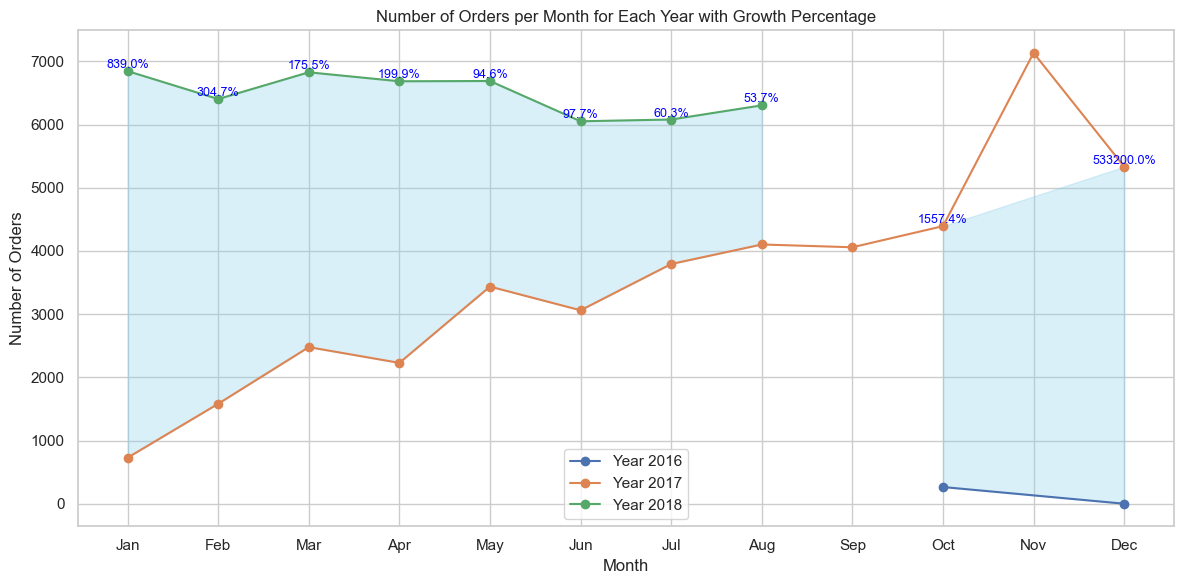

In [200]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_year'] = df['order_purchase_timestamp'].dt.year
df['order_month'] = df['order_purchase_timestamp'].dt.month

monthly_data = df.groupby(['order_year', 'order_month']).agg(
    number_of_orders=('order_id', 'nunique')  
).reset_index()

plt.figure(figsize=(12, 6))

for year in monthly_data['order_year'].unique():
    year_data = monthly_data[monthly_data['order_year'] == year]
    
    plt.plot(year_data['order_month'], year_data['number_of_orders'], marker='o', label=f'Year {year}')
    
    if year > min(monthly_data['order_year']):
        prev_year_data = monthly_data[monthly_data['order_year'] == year - 1]

        
        merged_data = pd.merge(year_data, prev_year_data, on='order_month', suffixes=('_current', '_prev'))
        
        growth_percentage = (merged_data['number_of_orders_current'] - merged_data['number_of_orders_prev']) / merged_data['number_of_orders_prev'] * 100
        
        plt.fill_between(merged_data['order_month'], merged_data['number_of_orders_prev'], merged_data['number_of_orders_current'], color='skyblue', alpha=0.3)
        
        for i, month in enumerate(merged_data['order_month']):
            plt.text(month, merged_data['number_of_orders_current'][i], f'{growth_percentage.iloc[i]:.1f}%', 
                     ha='center', va='bottom', fontsize=9, color='blue')

plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Month for Each Year with Growth Percentage')

plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend()

plt.tight_layout()
plt.show()


### Delivery time

In [36]:
df[['order_estimated_delivery_date', 'order_delivered_customer_date', 'order_delivered_carrier_date']]

order_estimated_delivery_date order_delivered_customer_date  \
0                        2017-10-30           2017-10-07 16:12:47   
1                        2017-11-09           2017-10-27 16:46:05   
2                        2017-11-06           2017-10-24 20:17:44   
3                        2017-09-27           2017-09-08 16:26:55   
4                        2017-11-16           2017-11-08 18:28:44   
...                             ...                           ...   
94465                    2017-03-16           2017-01-27 11:34:09   
94466                    2016-12-16           2016-10-25 20:11:24   
94467                    2017-03-15           2017-01-30 11:41:52   
94468                    2017-03-13           2017-01-26 16:25:11   
94469                    2017-03-16           2017-02-01 00:52:30   

      order_delivered_carrier_date  
0              2017-09-29 15:53:03  
1              2017-10-20 14:29:01  
2              2017-10-17 15:42:42  
3              2017-09-04 22:03:06  
4              2017-10-24 21:03:32  
...                            ...  
94465          2017-01-25 16:51:53  
94466          2016-10-25 11:44:28  
94467          2017-01-25 16:05:15  
94468          2017-01-24 14:49:32  
94469          2017-01-26 16:41:28  

[94470 rows x 3 columns]

In [37]:
df['actual_shipping_days'] = (df['order_delivered_customer_date'] - df['order_delivered_carrier_date']).dt.days
print(df['actual_shipping_days'].dtype)

int64


In [38]:
df['actual_shipping_days'] = df['actual_shipping_days'].astype(int)

In [39]:
# this shows an error in the system because the customer received the product before the delivered date 
df['actual_shipping_days'].lt(0).sum()

22

In [40]:
df['actual_shipping_days'] = df['actual_shipping_days'].where(df['actual_shipping_days'] >= 0, -999)

In [41]:
df['estimated_shipping_days'] = df['order_estimated_delivery_date'] - df['order_delivered_carrier_date']
df['estimated_shipping_days'] = df['estimated_shipping_days'].dt.days.astype(int)

In [42]:
df['estimated_shipping_days'].lt(0).sum()

445

In [43]:
df['estimated_shipping_days'] = df['estimated_shipping_days'].where(df['estimated_shipping_days'] >= 0, -999)

In [44]:
df['shipping_delay'] = df['actual_shipping_days'] - df['estimated_shipping_days']
df['shipping_delay'] = df['shipping_delay'].astype(int)

In [45]:
late = (df['shipping_delay'].gt(0) & df['shipping_delay'].lt(700)).sum()
early = df['shipping_delay'].lt(0).sum()
ontime = df['shipping_delay'].eq(0).sum()
error = df['shipping_delay'].gt(600).sum()

In [46]:
print(late, "orders were late")  
print(early, "orders were early") 
print(ontime, "orders were on time") 
print(error, "system error")

6581 orders were late
86055 orders were early
1389 orders were on time
445 system error


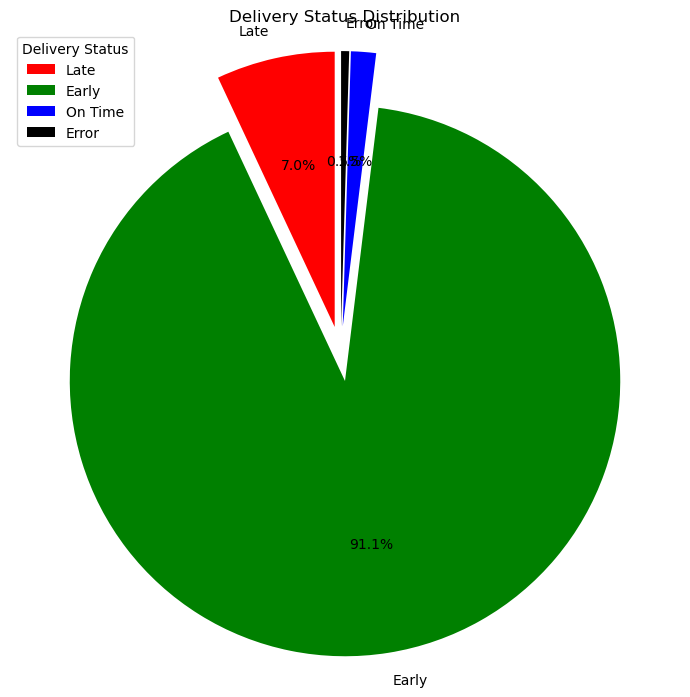

In [47]:
# Pie chart
sizes = [late, early, ontime, error]
labels = ['Late', 'Early', 'On Time', 'Error']
colors = ['red', 'green', 'blue', 'black']

# Create an explode effect to separate the slices
explode = (0.1, 0.1, 0.1, 0.1)  # Slightly separate each slice

fig, ax = plt.subplots(figsize=(7, 7))  # Adjust the figure size to make the chart bigger
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
ax.set_title('Delivery Status Distribution')
ax.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.

# Add a legend
plt.legend(labels, title="Delivery Status", loc="upper left")

# Adjust layout
plt.tight_layout()

plt.show()

In [48]:
def categorize_delivery_status(delay):
    if 0 < delay < 700:
        return 'late'
    elif delay < 0:
        return 'early'
    elif delay == 0:
        return 'ontime'
    elif delay > 600:
        return 'error'
    else:
        return 'unknown'  # This handles any unexpected cases

# Apply the function to create the new column
df['delivery_status'] = df['shipping_delay'].apply(categorize_delivery_status)

### Late Deliveries

In [66]:
late_delivery_info = df[df['delivery_status'] == 'late'][['seller_state', 'customer_state', 'grouped_category', 'review_score']]

In [120]:
total_sellers = city_counts['seller_state'].sum()
total_customers = city_counts['customer_state'].sum()

city_counts['seller_percentage'] = (city_counts['seller_state'] / total_sellers) * 100
city_counts['customer_percentage'] = (city_counts['customer_state'] / total_customers) * 100

city_counts[['state', 'seller_percentage', 'customer_percentage']]


state  seller_percentage  customer_percentage
0     AC           0.000000             0.045586
1     AL           0.000000             1.321988
2     AM           0.015195             0.091172
3     AP           0.000000             0.045586
4     BA           0.455858             6.260447
5     CE           0.121562             2.750342
6     DF           0.668591             2.005774
7     ES           0.258319             3.297371
8     GO           0.243124             2.020969
9     MA           1.154840             1.960188
10    MG           5.591855             8.235830
11    MS           0.045586             1.124449
12    MT           0.075976             0.835739
13    PA           0.015195             1.549916
14    PB           0.030391             0.790153
15    PE           0.243124             2.385656
16    PI           0.000000             0.987692
17    PR           5.895761             3.054247
18    RJ           4.467406            22.610546
19    RN           0.060781             0.729372
20    RO           0.000000             0.106367
21    RR           0.000000             0.075976
22    RS           0.926911             5.029631
23    SC           2.841513             4.543382
24    SE           0.000000             0.759763
25    SP          76.888011            26.895609
26    TO           0.000000             0.486248

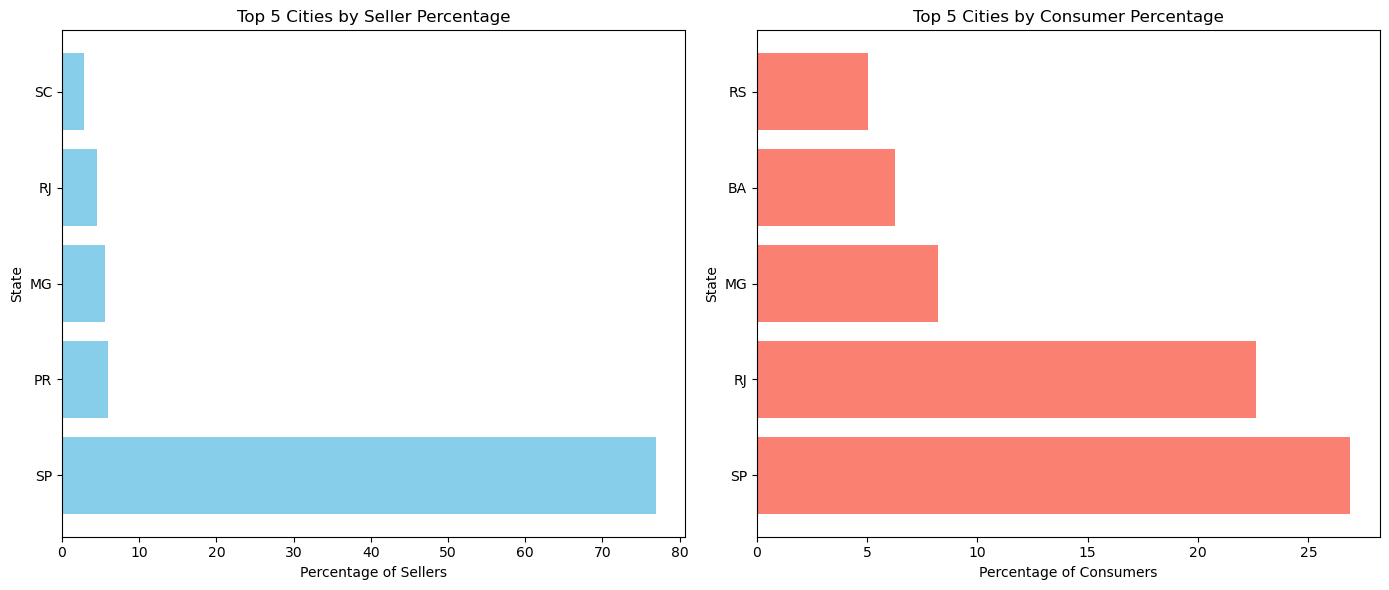

In [123]:
top_seller_states = city_counts[['state', 'seller_percentage']].sort_values(by='seller_percentage', ascending=False).head(5)
top_customer_states = city_counts[['state', 'customer_percentage']].sort_values(by='customer_percentage', ascending=False).head(5)


fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].barh(top_seller_states['state'], top_seller_states['seller_percentage'], color='skyblue')
ax[0].set_title('Top 5 Cities by Seller Percentage')
ax[0].set_xlabel('Percentage of Sellers')
ax[0].set_ylabel('State')

ax[1].barh(top_customer_states['state'], top_customer_states['customer_percentage'], color='salmon')
ax[1].set_title('Top 5 Cities by Consumer Percentage')
ax[1].set_xlabel('Percentage of Consumers')
ax[1].set_ylabel('State')

plt.tight_layout()
plt.show()


In [92]:
late_delivery_info['grouped_category'].value_counts()

grouped_category
home_and_kitchen           1172
electronics                1015
gifts_and_miscellaneous     968
health_and_beauty           840
sports_and_leisure          516
furniture                   496
tools_and_construction      363
toys_and_games              307
office_and_stationery       259
baby_and_children           211
fashion                     137
pet_shop                     84
food_and_beverages           60
music_and_art                58
books                        45
industry_and_business        25
marketplace                  10
media                         9
security_and_services         6
Name: count, dtype: int64

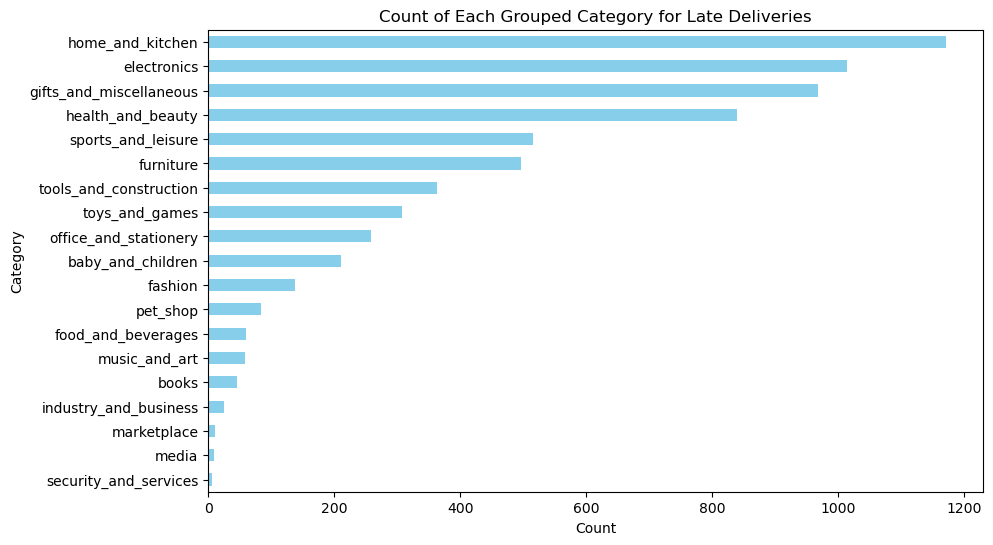

In [109]:
category_counts = late_delivery_info['grouped_category'].value_counts().sort_values(ascending=True)

category_counts.plot(kind='barh', figsize=(10, 6), color='skyblue')

plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Count of Each Grouped Category for Late Deliveries')

plt.show()

In [154]:
ontime_review = ontime_delivery_info['review_score'].value_counts()
ontime_review

review_score
5.0    54566
4.0    17796
3.0     7043
1.0     5734
2.0     2305
Name: count, dtype: int64

### Check Rating 

In [74]:
review = df['review_score'].value_counts()
review

review_score
5.0    55991
4.0    18614
1.0     9165
3.0     7823
2.0     2877
Name: count, dtype: int64

In [73]:
late_review = late_delivery_info['review_score'].value_counts()
late_review

review_score
1.0    3173
5.0    1357
4.0     773
3.0     747
2.0     531
Name: count, dtype: int64

In [128]:
late_percentage = (late_review/late_review.sum()) * 100
late_percentage

review_score
1.0    48.214557
5.0    20.619967
4.0    11.745935
3.0    11.350859
2.0     8.068683
Name: count, dtype: float64

In [78]:
relative_percentage = (late_review/ review) * 100
relative_percentage

review_score
1.0    34.620840
2.0    18.456726
3.0     9.548766
4.0     4.152788
5.0     2.423604
Name: count, dtype: float64

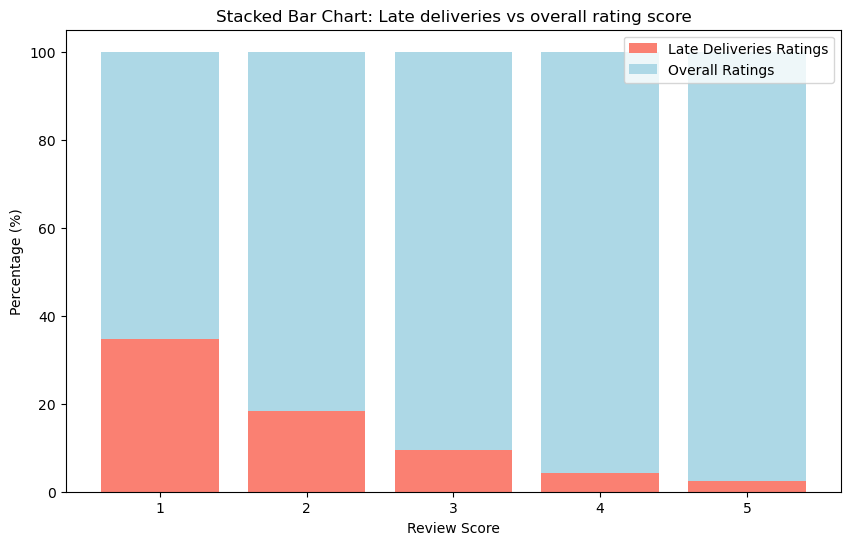

In [94]:
remaining_percentage = 100 - relative_percentage

# Combine both percentages into a DataFrame for easier plotting
percentage_df = pd.DataFrame({
    'Review Score': relative_percentage.index,
    'Late Percentage': relative_percentage.values,
    'Remaining Percentage': remaining_percentage.values
})

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(percentage_df['Review Score'], percentage_df['Late Percentage'], label='Late Deliveries Ratings', color='salmon')
plt.bar(percentage_df['Review Score'], percentage_df['Remaining Percentage'], label='Overall Ratings', color='lightblue', bottom=percentage_df['Late Percentage'])

# Adding labels and title
plt.xlabel('Review Score')
plt.ylabel('Percentage (%)')
plt.title('Stacked Bar Chart: Late deliveries vs overall rating score')
plt.legend()

plt.show()

The plot above shows that late deliveries account for 34% of the overall 1-star ratings. Additionally, within the late delivery category, 1-star ratings represent 50% of the total. For 5-star ratings within the late delivery group, the value is 1357, which constitutes 20% of the total late deliveries. However, when considering the entire dataset, this does not significantly affect the overall 5-star rating distribution, unlike the 1-star ratings. 

#### Most selling product

In [93]:
top_selling_products = df['grouped_category'].value_counts().head(10)
top_selling_products

grouped_category
home_and_kitchen           17242
gifts_and_miscellaneous    13889
electronics                13820
health_and_beauty          11659
sports_and_leisure          7472
furniture                   6689
tools_and_construction      5248
toys_and_games              4746
office_and_stationery       3475
baby_and_children           2752
Name: count, dtype: int64

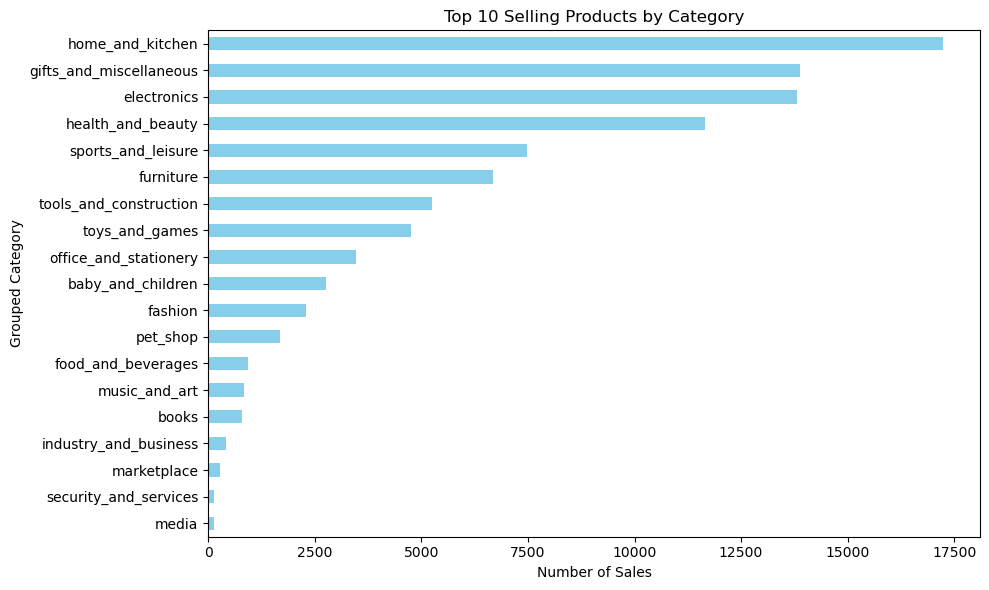

In [148]:
# Get the top 10 selling products by category
top_selling_products = df['grouped_category'].value_counts().sort_values(ascending=True)

# Plotting the top-selling products as a horizontal bar chart
plt.figure(figsize=(10, 6))
top_selling_products.plot(kind='barh', color='skyblue')
plt.title('Top 10 Selling Products by Category')
plt.xlabel('Number of Sales')
plt.ylabel('Grouped Category')
plt.tight_layout()
plt.show()

In [149]:
total_price_per_product = df.groupby('grouped_category')[['payment_value', 'price']].sum().reset_index()

total_price_per_product_sorted = total_price_per_product.sort_values(by='price', ascending=False)

total_price_per_product_sorted

grouped_category  payment_value       price
6   gifts_and_miscellaneous     2738048.96  2384004.36
8          home_and_kitchen     2558347.28  1960418.57
7         health_and_beauty     1823877.95  1533312.88
2               electronics     1915736.96  1462072.81
16       sports_and_leisure     1097594.52   875703.65
17   tools_and_construction      945538.10   708138.63
5                 furniture      973867.31   659584.35
18           toys_and_games      692790.86   588065.42
13    office_and_stationery      592804.59   415869.45
0         baby_and_children      454116.77   384016.60
12            music_and_art      230385.21   206494.14
14                 pet_shop      245224.61   193106.37
3                   fashion      226197.17   179435.50
9     industry_and_business      119578.29    98067.67
1                     books       81116.07    64408.16
4        food_and_beverages       81104.69    56666.60
10              marketplace       31961.84    25229.19
15    security_and_services       27846.33    15052.53
11                    media       14339.40    11312.28

In [118]:
category_total_counts = df['grouped_category'].value_counts().reset_index()

category_total_counts.columns = ['grouped_category', 'total_count']

category_rating_counts = df.groupby(['grouped_category', 'review_score']).size().reset_index(name='count')

category_rating_counts = category_rating_counts.merge(category_total_counts, on='grouped_category', how='left')

category_rating_counts['percentage'] = (category_rating_counts['count'] / category_rating_counts['total_count']) * 100

category_rating_counts[['grouped_category', 'review_score', 'count', 'percentage']]


grouped_category  review_score  count  percentage
0   baby_and_children           1.0    290   10.537791
1   baby_and_children           2.0     86    3.125000
2   baby_and_children           3.0    239    8.684593
3   baby_and_children           4.0    510   18.531977
4   baby_and_children           5.0   1627   59.120640
..                ...           ...    ...         ...
90     toys_and_games           1.0    414    8.723135
91     toys_and_games           2.0    119    2.507375
92     toys_and_games           3.0    389    8.196376
93     toys_and_games           4.0    869   18.310156
94     toys_and_games           5.0   2955   62.262958

[95 rows x 4 columns]

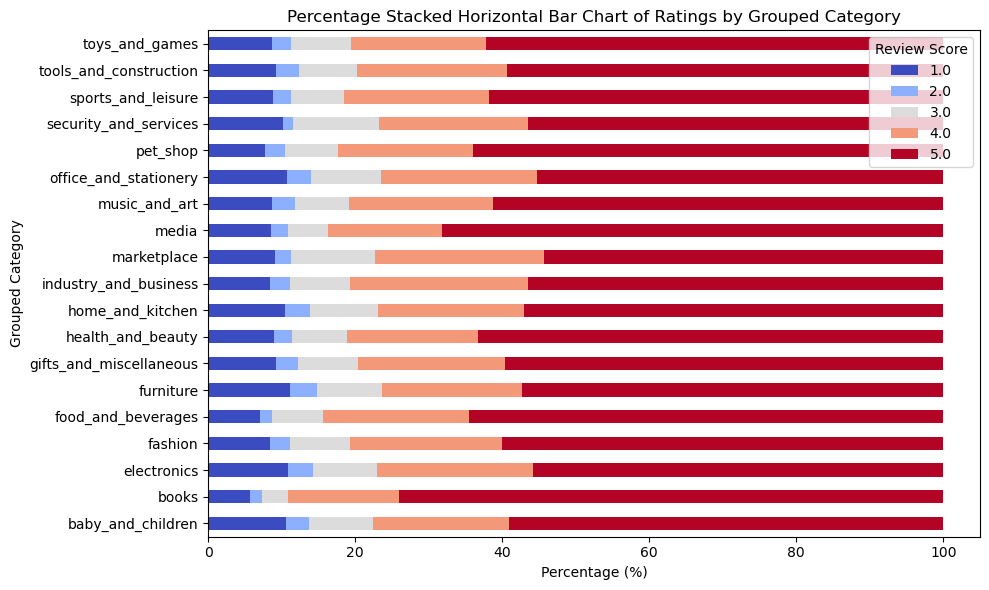

In [117]:
pivot_percentage_data = category_rating_counts.pivot_table(index='grouped_category', columns='review_score', values='percentage', aggfunc='sum')

pivot_percentage_data.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Percentage Stacked Horizontal Bar Chart of Ratings by Grouped Category')
plt.xlabel('Percentage (%)')
plt.ylabel('Grouped Category')
plt.legend(title='Review Score')
plt.tight_layout()
plt.show()

### Payment method

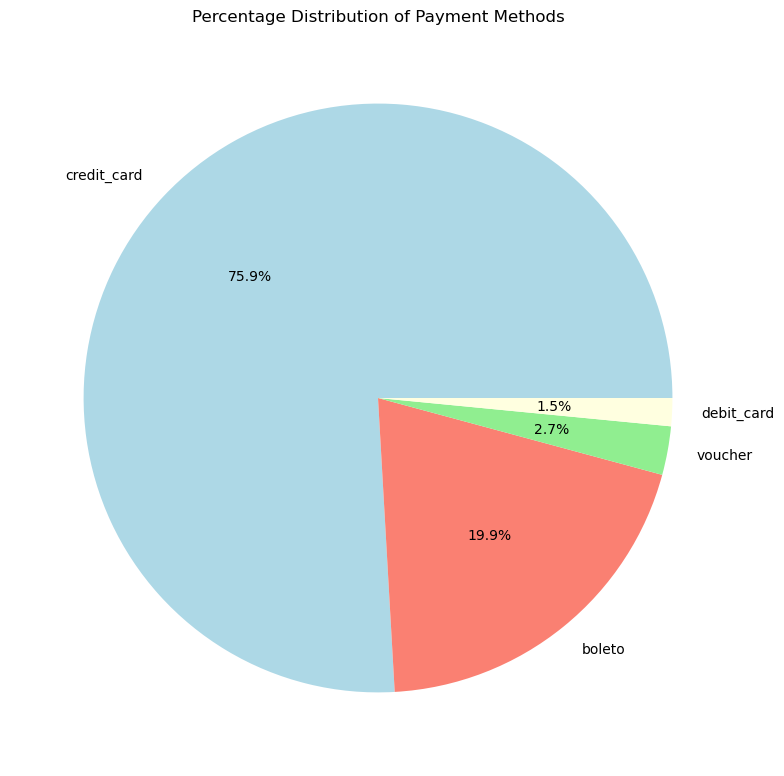

In [146]:
payment_method_counts = df['payment_type'].value_counts()
payment_method_percentage = (payment_method_counts / len(df)) * 100

plt.figure(figsize=(8, 8))
payment_method_percentage.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'salmon', 'lightgreen', 'lightyellow'])
plt.title('Percentage Distribution of Payment Methods')
plt.ylabel('')
plt.tight_layout()
plt.show()

# RMF

# CHURN PREDICTION

In [2]:
print("churn prediction")

churn prediction
